# Exercises in neural network and deep learning II

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall, F1Score

## Exercise 1

In this exercise, we will use the titanic dataset to build a neural network classifier for the target variable `Survived`. In this exercise, all the necessary steps are broken down to small individual task you should do. So, do the following tasks:

1. Load in the titanic dataset (on Moodle as "titanic_survival_data.csv"), select the columns "Pclass", "Sex", "Age", and "Fare" for the feature set X and "Survived" for the target variable y.
2. For the columns "Age" and "Fare", replace the missing values with the column's mean.
3. Turn the variables "Pclass" and "Sex" into dummy variables.
4. Do a train-test split of the data
5. Scale the X training dataset, using the standard scaler.
6. Transform the X test dataset with the same scaler fitted in task 5.
7. Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.
8. Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.
9. Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.
10. Plot the training and validation loss and decide on a best number of epochs.
11. Rebuild and retrain the model for the number of epochs decided in task 10 above.
12. Evaluate the model on the test dataset to get the test accuracy.
13. Calculate precision, recall, and f1-score for the model on the test dataset.
14. Plot the Confusion matrix for the test dataset.

### Task 1.1 Load in the data

In [ ]:
titanic = pd.read_csv('data\\titanic_survival_data.csv')
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']] 
X

In [ ]:
y = titanic[['Survived']]
y

### Task 1.2 Preprocessing
For the columns "Age" and "Fare", replace the missing values with the column's mean.


In [ ]:
age_means = X['Age'].mean()
fare_means = X['Fare'].mean()

X[['Age']] = X[['Age']].fillna(age_means)
X[['Fare']] = X[['Fare']].fillna(fare_means)

### Task 1.3 One-hot encoding
Turn the variables "Pclass" and "Sex" into dummy variables.


In [ ]:
X = pd.get_dummies(X, columns=['Pclass', 'Sex'], drop_first=True)
X

### Task 1.4 Test-train split
Do a train-test split of the data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)



### Task 1.5 Scale X_train
Scale the X training dataset, using the standard scaler.

In [ ]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) 


### Task 1.6 Transform X_test
Transform the X test dataset with the same scaler fitted in task 5.

In [ ]:
X_test_scaled = scaler.transform(X_test)

### Task 1.7 Transform into arrays
Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.


In [ ]:
X_train_array = X_train_scaled
X_test_array = X_test_scaled
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()



### Task 1.8 Create NN model
Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy", "precision", "f1_score", "recall"])

### Task 1.9 Train NN model
Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.


In [ ]:

partial_history = model.fit(X_train,
                     y_train,
                     epochs = 50,
                     batch_size=64,
                     validation_split=0.2)


### Task 1.10 Plotting
Plot the training and validation loss and decide on a best number of epochs.


In [ ]:
import matplotlib.pyplot as plt
history_dict = partial_history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Task 1.11 Retrain with 8 epochs 
Rebuild and retrain the model for the number of epochs decided in task 10 above.


In [ ]:

history_full = model.fit(X_train,
                     y_train,
                     epochs = 8,
                     batch_size=64)


### Task 1.12 + 1.13 Evaluation 
Evaluate the model on the test dataset to get the test accuracy.


In [ ]:
results = model.evaluate(X_test, y_test)
print(f'{results}')


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)  #threshold for the confidence between 0-1

cm = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
matrix.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

### Task 2.1 Load in the data
Loading in data

In [299]:
adult  = pd.read_csv("data\\adult.csv")
adult.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Task 2.2 Preprocessing
Correcting target variable `income` and dropping rows where value for  `workclass`, `occupation` and `native-country` is N/A, and  assigning `X` the input variables and `y` target vector.


removing `fnlwgt`,`capital-gain`, `capital-loss`, as `fnlwgt` is represents the final weight assigned to each individual in the dataset. Irrelevant for determining income.
`capital-gain` and `capital-loss` has too many Zero values, might result in difficulties for the model to generalize.

Also the lower amount of columns makes it way more managable.

In [300]:
adult['income'] = adult['income'].replace({"<=50K." : "<=50K", ">50K.": ">50K" })
print(f'{adult["income"].value_counts()}\n')

# #bins for age
# age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
# age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
# adult['age_group'] = pd.cut(adult['age'], bins=age_bins, labels=age_labels, right=False)


# # bins for hour-per-week
# hours_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# hours_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

#adult['hours_per_week_group'] = pd.cut(adult['hours-per-week'], bins=hours_bins, labels=hours_labels, right=False)

print('True vals below indicate the null values in the columns')
wc = adult["workclass"].isna().value_counts()
oc = adult["occupation"].isna().value_counts()
nc = adult["native-country"].isna().value_counts()

print(wc, "\n")
print(oc, "\n")
print(nc, "\n")

# dropping rows containing N/A values 
adult= adult.dropna()

X = adult[['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                  'race', 'sex', 'hours-per-week', 'native-country']]
y = adult[['income']]


income
<=50K    37155
>50K     11687
Name: count, dtype: int64

True vals below indicate the null values in the columns
workclass
False    47879
True       963
Name: count, dtype: int64 

occupation
False    47876
True       966
Name: count, dtype: int64 

native-country
False    48568
True       274
Name: count, dtype: int64 



### Task 2.3 One-hot encoding
Performing onehot encoding of the categorical variables:
<br>
For X:
    workclass
    education
    marital-status
    occupation
    relationship
    race
    sex
    native-country 
<br>
For y:
    income



In [301]:
X = pd.get_dummies(X, columns= ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)

y = y['income'].map({'<=50K': 0, '>50K': 1})

In [302]:
X

,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,40,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,50,13,13,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,13,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48837,39,13,36,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,38,13,50,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,44,13,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Task 2.4 Scale X_train
Scaling first

In [303]:
scaler = StandardScaler()
numerical_features = ['age', 'education-num', 'hours-per-week']
X[numerical_features] = scaler.fit_transform(X[numerical_features]) 

### Task 2.5 Test-train split
Scale the X training dataset, using the standard scaler.

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [305]:
print("Shape of X_train (training features):", X_train.shape)
print("Shape of X_test (testing features):", X_test.shape)
print("Shape of y_train (training labels):", y_train.shape)
print("Shape of y_test (testing labels):", y_test.shape)

Shape of X_train (training features): (38096, 97)
Shape of X_test (testing features): (9525, 97)
Shape of y_train (training labels): (38096,)
Shape of y_test (testing labels): (9525,)


### Task 2.6 Transform into arrays
Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.


In [306]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Task 2.7 Create NN model


In [307]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Task 2.8 Train NN model
Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.


In [308]:
partial_history = model.fit(X_train,
                     y_train,
                     epochs = 50,
                     batch_size=64,
                     validation_split=0.2)


Epoch 1/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7916 - loss: 0.4456 - val_accuracy: 0.8327 - val_loss: 0.3540
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8376 - loss: 0.3465 - val_accuracy: 0.8349 - val_loss: 0.3479
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8401 - loss: 0.3475 - val_accuracy: 0.8357 - val_loss: 0.3483
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.3398 - val_accuracy: 0.8367 - val_loss: 0.3449
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8432 - loss: 0.3380 - val_accuracy: 0.8354 - val_loss: 0.3447
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8388 - loss: 0.3437 - val_accuracy: 0.8375 - val_loss: 0.3449
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.3433 - val_accuracy: 0.8354 - val_loss: 0.3437
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8419 - loss: 0.3403 - val_accuracy: 0.

### Task 2.9 Plotting
Plot the training and validation loss and decide on a best number of epochs.


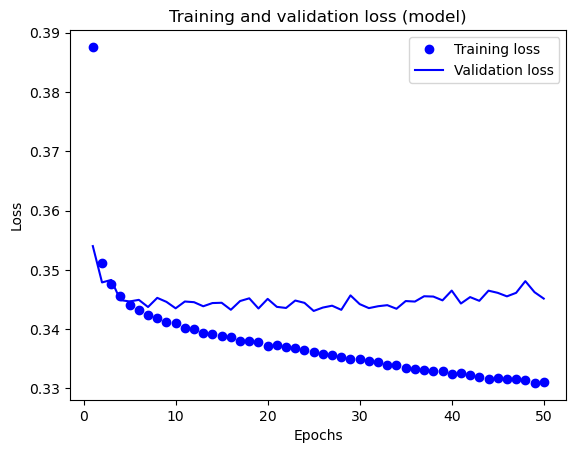

In [309]:
import matplotlib.pyplot as plt
history_dict = partial_history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

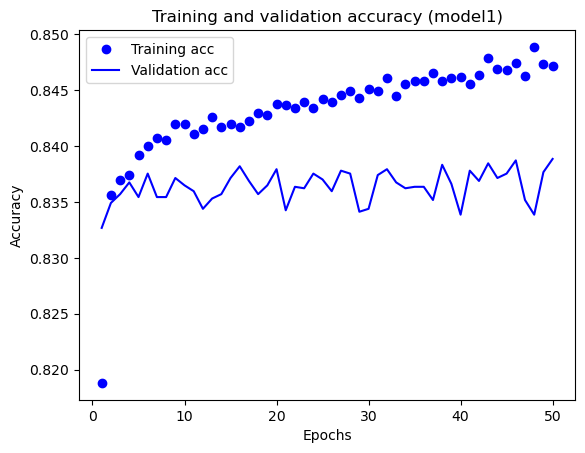

In [310]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy (model1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Task 2.11 Retrain with 20 epochs 
Rebuild and retrain the model for the number of epochs decided in task above.


In [311]:
history = model.fit(X_train,
                     y_train,
                     epochs = 20,
                     batch_size=64)


Epoch 1/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8469 - loss: 0.3289
Epoch 2/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8472 - loss: 0.3303
Epoch 3/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8480 - loss: 0.3306
Epoch 4/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8484 - loss: 0.3298
Epoch 5/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8479 - loss: 0.3306
Epoch 6/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8464 - loss: 0.3323
Epoch 7/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8479 - loss: 0.3319
Epoch 8/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8437 - loss: 0.3345
Epoch 9/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8480 - loss: 0.3323
Epoch 10/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8484 - loss: 0.3315
Epoch 11/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8453 - loss: 0.3337
Epoch 12/20
596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

### Task 2.12 + 2.13 Evaluation 
Evaluate the model on the test dataset to get the test accuracy.


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8428 - loss: 0.3450
[0.3428630530834198, 0.8415747880935669]
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


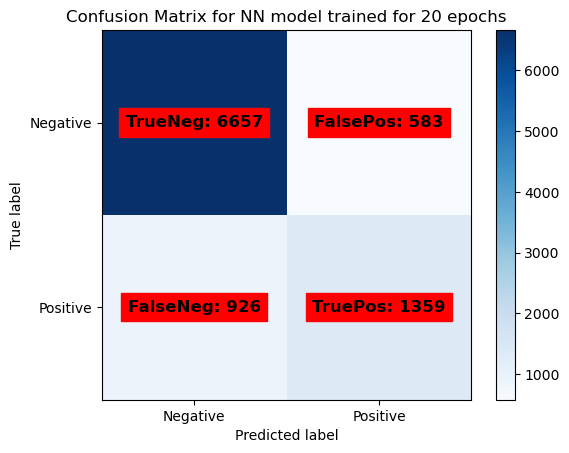

In [312]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
results = model.evaluate(X_test, y_test)
print(f'{results}')

y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)  #threshold for the confidence between 0-1

cm = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
matrix.plot(cmap=plt.cm.Blues)
plt.text(0, 0, f'TrueNeg: {cm[0, 0]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(0, 1, f'FalseNeg: {cm[1, 0]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(1, 0, f'FalsePos: {cm[0, 1]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(1, 1, f'TruePos: {cm[1, 1]}', ha='center', va='center', backgroundcolor='red',  color='black', fontsize=12, weight='bold')

plt.title('Confusion Matrix for NN model trained for 20 epochs')
plt.show()

In [313]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

es_model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

es_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

es_history = es_model.fit(X_train,
                            y_train,
                            epochs=50,
                            batch_size=64,
                            validation_split=0.2,
                            callbacks=[early_stopping])


Epoch 1/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7885 - loss: 0.4403 - val_accuracy: 0.8323 - val_loss: 0.3511
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8298 - loss: 0.3535 - val_accuracy: 0.8358 - val_loss: 0.3469
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8321 - loss: 0.3517 - val_accuracy: 0.8335 - val_loss: 0.3466
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8378 - loss: 0.3461 - val_accuracy: 0.8348 - val_loss: 0.3452
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8409 - loss: 0.3398 - val_accuracy: 0.8344 - val_loss: 0.3445
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.3477 - val_accuracy: 0.8358 - val_loss: 0.3447
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8361 - loss: 0.3476 - val_accuracy: 0.8366 - val_loss: 0.3428
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8376 - loss: 0.3464 - val_accuracy: 0.

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8410 - loss: 0.3425
[0.3403671979904175, 0.8423097133636475]
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step


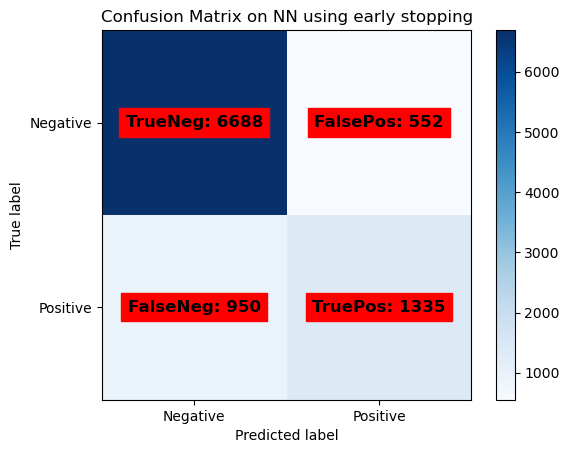

In [314]:


es_results = es_model.evaluate(X_test, y_test)
print(f'{es_results}')

es_y_pred_proba = es_model.predict(X_test).flatten()
es_y_pred = (es_y_pred_proba > 0.5).astype(int)  #threshold for the confidence between 0-1

es_cm = confusion_matrix(y_test, es_y_pred)

es_matrix = ConfusionMatrixDisplay(confusion_matrix=es_cm, display_labels=['Negative', 'Positive'])

es_matrix.plot(cmap=plt.cm.Blues)
plt.text(0, 0, f'TrueNeg: {es_cm[0, 0]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(0, 1, f'FalseNeg: {es_cm[1, 0]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(1, 0, f'FalsePos: {es_cm[0, 1]}', ha='center', va='center', backgroundcolor='red', color='black', fontsize=12, weight='bold')
plt.text(1, 1, f'TruePos: {es_cm[1, 1]}', ha='center', va='center', backgroundcolor='red',  color='black', fontsize=12, weight='bold')

plt.title('Confusion Matrix on NN using early stopping')
plt.show()

In [316]:
print(f'{max(history.epoch) +1} epoch model \n')
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print('\n')

print(f'early stop NN model {max(es_history.epoch) +1} epochs\n')
score = es_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


20 epoch model 

Test loss: 0.3428630530834198
Test accuracy: 0.8415747880935669


early stop NN model 19 epochs

Test loss: 0.3403671979904175
Test accuracy: 0.8423097133636475


## Exercise 3

Based on the **AmesHousing dataset** from the class on regression, make a deep learning regression model to predict the sales price variable.

### Task 3.1 Load in the data

### Task 3.2 Preprocessing
For the columns "Age" and "Fare", replace the missing values with the column's mean.


### Task 3.3 One-hot encoding
Turn the variables "Pclass" and "Sex" into dummy variables.


### Task 3.4 Test-train split
Do a train-test split of the data


### Task 3.5 Scale X_train
Scale the X training dataset, using the standard scaler.

### Task 3.6 Transform X_test
Transform the X test dataset with the same scaler fitted in task 5.

### Task 3.7 Transform into arrays
Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.


### Task 3.8 Create NN model
Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.


### Task 3.9 Train NN model
Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.


### Task 3.10 Plotting
Plot the training and validation loss and decide on a best number of epochs.


### Task 3.11 Retrain with 8 epochs 
Rebuild and retrain the model for the number of epochs decided in task 10 above.


### Task 3.12 + 3.13 Evaluation 
Evaluate the model on the test dataset to get the test accuracy.
